In [15]:
import pandas as pd
import numpy as np
import os


import sqlalchemy as db
from sqlalchemy import create_engine, MetaData, inspect

In [16]:
engine = db.create_engine('sqlite:////Users/michaelharnett/Library/Messages/chat.db')
connection = engine.connect()
metadata = db.MetaData()

In [17]:
savagesdf = pd.read_sql("select distinct m.rowid ,m.is_from_me IsFromMe ,case when m.is_from_me = 1 then m.account else h.id end as FromPhoneNumber ,datetime((m.date / 1000000000) + 978307200, 'unixepoch', 'localtime') as TextDate, m.text MessageText,c.display_name RoomName from message as m left join handle as h on m.handle_id = h.rowid left join chat as c on m.cache_roomnames = c.room_name left join chat_handle_join as ch on c.rowid = ch.chat_id left join handle as h2 on ch.handle_id = h2.rowid where RoomName LIKE 'Savages%' order by m.date desc;", engine)
savagesdf.head(4)

,ROWID,IsFromMe,FromPhoneNumber,TextDate,MessageText,RoomName
0,40878,1,E:michaelcharnett@gmail.com,2022-05-01 20:35:23,Wordle 316 4/6\n\n⬛⬛🟩⬛⬛\n⬛⬛🟩⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,SAVAGES 🍃❄️🎉💊🍾🥂
1,40736,0,+12017248296,2022-04-30 16:42:50,jealous,SAVAGES 🍃❄️🎉💊🍾🥂
2,40733,0,+12017554735,2022-04-30 15:51:49,Wordle 315 3/6\n\n⬛⬛🟨🟩⬛\n⬛🟨🟨🟩⬛\n🟩🟩🟩🟩🟩,SAVAGES 🍃❄️🎉💊🍾🥂
3,40727,0,+18456083263,2022-04-30 14:33:14,Loved “If you can prove it’s your money you ar...,SAVAGES 🍃❄️🎉💊🍾🥂


In [18]:
savagesdf = savagesdf[['FromPhoneNumber','TextDate','MessageText']] # taking only the fields I need
savagesdf = savagesdf.rename(columns = {'FromPhoneNumber':'player', 'TextDate':'date', 'MessageText':'message'}) #fixing names

savagesdf.head(4)

,player,date,message
0,E:michaelcharnett@gmail.com,2022-05-01 20:35:23,Wordle 316 4/6\n\n⬛⬛🟩⬛⬛\n⬛⬛🟩⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩
1,+12017248296,2022-04-30 16:42:50,jealous
2,+12017554735,2022-04-30 15:51:49,Wordle 315 3/6\n\n⬛⬛🟨🟩⬛\n⬛🟨🟨🟩⬛\n🟩🟩🟩🟩🟩
3,+18456083263,2022-04-30 14:33:14,Loved “If you can prove it’s your money you ar...


In [19]:
savagesdf.player.value_counts()

+12017248296                   2794
+12017447544                   2313
+18456083263                   1704
+12017554735                   1510
E:michaelcharnett@gmail.com    1362
+12012706619                    651
e:michaelcharnett@gmail.com       1
Name: player, dtype: int64

In [6]:
# curious, my email shows up twice, one with an 'E' one wiht an 'e' ...i did not see this in the family chat
# I am thinking this is because of using my laptop? it is only one message, and a reaction, but I should build
# in checks for both in case

savagesdf[savagesdf.player == 'e:michaelcharnett@gmail.com']

,player,date,message
10325,e:michaelcharnett@gmail.com,2021-07-10 17:12:54,Emphasized an image


In [20]:
savagesdf.loc[savagesdf.player == '+12017248296', 'player'] = 'kell'
savagesdf.loc[savagesdf.player == '+12017447544', 'player'] = 'd'
savagesdf.loc[savagesdf.player == '+18456083263', 'player'] = 'drie'
savagesdf.loc[savagesdf.player == '+12017554735', 'player'] = 'jose'
savagesdf.loc[savagesdf.player == '+12012706619', 'player'] = 'nick'
savagesdf.loc[savagesdf.player == 'E:michaelcharnett@gmail.com', 'player'] = 'michael'
savagesdf.loc[savagesdf.player == 'e:michaelcharnett@gmail.com', 'player'] = 'michael'

In [21]:
savagesdf.head(5)

,player,date,message
0,michael,2022-05-01 20:35:23,Wordle 316 4/6\n\n⬛⬛🟩⬛⬛\n⬛⬛🟩⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩
1,kell,2022-04-30 16:42:50,jealous
2,jose,2022-04-30 15:51:49,Wordle 315 3/6\n\n⬛⬛🟨🟩⬛\n⬛🟨🟨🟩⬛\n🟩🟩🟩🟩🟩
3,drie,2022-04-30 14:33:14,Loved “If you can prove it’s your money you ar...
4,drie,2022-04-30 14:33:09,LIKE YOU STOLE from me so I need that back 😂☠️


In [22]:
savagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10335 entries, 0 to 10334
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   player   10335 non-null  object
 1   date     10335 non-null  object
 2   message  10331 non-null  object
dtypes: object(3)
memory usage: 242.4+ KB


In [23]:
savagesdf.date = pd.to_datetime(savagesdf.date)

In [24]:
savagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10335 entries, 0 to 10334
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   player   10335 non-null  object        
 1   date     10335 non-null  datetime64[ns]
 2   message  10331 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 242.4+ KB


In [25]:
savagesdf[savagesdf.date > '2022-03-09']

,player,date,message
0,Michael Michaelson,2022-04-24 17:16:35,How’s everyone’s weekend going
1,Michael Michaelson,2022-04-24 15:20:56,What’s up savages
2,Michael Michaelson,2022-04-24 13:53:47,Wordle 309 4/6\n\n⬛🟨⬛⬛⬛\n⬛⬛🟩⬛🟩\n⬛⬛🟨🟨⬛\n🟩🟩🟩🟩🟩
3,Killa Kels,2022-04-24 13:53:33,Laughed at an image
4,Hoesay,2022-04-24 13:53:08,￼
...,...,...,...
1395,DeAnimal,2022-03-09 10:36:16,Ew
1396,Killa Kels,2022-03-09 10:34:09,its gonna snow
1397,Killa Kels,2022-03-09 10:33:44,wait what
1398,Drie,2022-03-09 08:59:57,Are we supposed to get


In [28]:
### depricated

# # Creating columns
# savagesdf['wordle_check'] = ''
# savagesdf['game_num'] = ''
# savagesdf['score'] = ''

# # fixing indexes
# savagesdf = savagesdf.dropna()
# savagesdf = savagesdf.reset_index()
# savagesdf =savagesdf.drop(columns = ['index'])

# #updating values
# for i in range(1,len(savagesdf)):
#     savagesdf.loc[i,'wordle_check'] = savagesdf.loc[i,'message'][:6]
#     savagesdf.loc[i,'game_num'] = savagesdf.loc[i,'message'][7:10]
#     savagesdf.loc[i,'score'] = savagesdf.loc[i,'message'][11:14]
    



In [33]:
#### depricated


# # creating wordledf, df of just wordle messages
# savages_wordledf = savagesdf[savagesdf.wordle_check == 'Wordle']
# savages_wordledf = savages_wordledf.drop(columns = ['message','wordle_check'])



# # changing scores to remove the denominator, a they're all out of 6
# savages_wordledf = savages_wordledf.reset_index()
# savages_wordledf = savages_wordledf.drop(columns = ['index'])   ##for some reason, it works if I keep resetting index

# # there was a blank space in nick's first entry, he must have started a text with 'wordle' ON 2/7



# for i in range(len(savages_wordledf)):
#     savages_wordledf.loc[i, 'score'] = savages_wordledf.loc[i, 'score'][0]

IndexError: string index out of range

In [32]:
savages_wordledf

,player,date,game_num,score
0,Michael Michaelson,2022-04-24 13:53:47,309,4
1,Killa Kels,2022-04-24 07:38:58,309,5
2,Nick Cosby,2022-04-23 18:00:53,308,5
3,Hoesay,2022-04-23 15:58:55,308,4
4,Michael Michaelson,2022-04-23 15:58:53,308,3
...,...,...,...,...
173,Killa Kels,2022-02-11 07:30:40,237,6
174,Hoesay,2022-02-10 13:13:20,236,3
175,Killa Kels,2022-02-08 14:13:48,234,6
176,Michael Michaelson,2022-02-08 13:46:58,234,5


In [35]:
savages_wordledf.iloc[177]['game_num']

''

In [36]:
savages_wordledf.game_num.value_counts()

283    4
261    4
293    4
294    4
278    4
      ..
270    1
272    1
273    1
274    1
       1
Name: game_num, Length: 65, dtype: int64

In [37]:
savages_wordledf[savages_wordledf.game_num != '']

,player,date,game_num,score
0,Michael Michaelson,2022-04-24 13:53:47,309,4
1,Killa Kels,2022-04-24 07:38:58,309,5
2,Nick Cosby,2022-04-23 18:00:53,308,5
3,Hoesay,2022-04-23 15:58:55,308,4
4,Michael Michaelson,2022-04-23 15:58:53,308,3
...,...,...,...,...
172,Hoesay,2022-02-11 08:28:22,237,5
173,Killa Kels,2022-02-11 07:30:40,237,6
174,Hoesay,2022-02-10 13:13:20,236,3
175,Killa Kels,2022-02-08 14:13:48,234,6


# there was a blank space in nick's first entry, he must have started a text with 'wordle' ON 2/7

clearly there are fringe cases I needto account for

In [48]:
tempy = savagesdf[savagesdf.player == 'Nick Cosby']


In [51]:
tempy[tempy.date < '2022-02-08']

,player,date,message,wordle_check,game_num,score
2454,Nick Cosby,2022-02-07 13:43:26,Wordle?,Wordle,,
2503,Nick Cosby,2022-02-07 10:45:56,Do we,Do we,,
2553,Nick Cosby,2022-02-06 22:54:52,Sunday scaries are REAL,Sunday,sca,ies
2569,Nick Cosby,2022-02-06 12:38:05,Lmao,Lmao,,
2581,Nick Cosby,2022-02-04 16:26:48,That’s why Steve and Sean are fraternal not id...,That’s,why,Ste
...,...,...,...,...,...,...
9970,Nick Cosby,2021-07-20 08:13:14,Chilll that happened because of the delta vari...,Chilll,tha,ha
9983,Nick Cosby,2021-07-19 14:52:26,I was using the bathroom bored as fuck,I was,sin,th
9986,Nick Cosby,2021-07-19 14:26:27,It’s mad complicated,It’s,mad,com
9989,Nick Cosby,2021-07-19 14:05:57,At 1 pm they tell you the word\n\nThen they sa...,At 1 p,th,y t


In [13]:

# Creating columns
savagesdf['wordle_check'] = ''
savagesdf['game_num'] = ''
savagesdf['score'] = ''

# fixing indexes
savagesdf = savagesdf.dropna()
savagesdf = savagesdf.reset_index()
savagesdf =savagesdf.drop(columns = ['index'])

#updating values
for i in range(1,len(savagesdf)):
    savagesdf.loc[i,'wordle_check'] = savagesdf.loc[i,'message'][:6]
    savagesdf.loc[i,'game_num'] = savagesdf.loc[i,'message'][7:10]
    savagesdf.loc[i,'score'] = savagesdf.loc[i,'message'][11:14]
    


# creating wordledf, df of just wordle messages
savages_wordledf = savagesdf[savagesdf.wordle_check == 'Wordle']
savages_wordledf = savages_wordledf.drop(columns = ['message','wordle_check'])



# changing scores to remove the denominator, a they're all out of 6
savages_wordledf = savages_wordledf.reset_index()
savages_wordledf = savages_wordledf.drop(columns = ['index'])   ##for some reason, it works if I keep resetting index

# there was a blank space in nick's first entry, he must have started a text with 'wordle' ON 2/7
savages_wordledf = savages_wordledf[savages_wordledf.game_num != '']


for i in range(len(savages_wordledf)):
    savages_wordledf.loc[i, 'score'] = savages_wordledf.loc[i, 'score'][0]

In [14]:
savages_wordledf

,player,date,game_num,score
0,jose,2022-04-30 15:51:49,315,3
1,kell,2022-04-30 13:10:06,315,X
2,michael,2022-04-29 08:46:58,314,5
3,kell,2022-04-29 08:44:08,314,3
4,jose,2022-04-29 08:34:34,314,2
...,...,...,...,...
192,jose,2022-02-11 08:30:17,237,5
193,kell,2022-02-11 08:14:40,237,6
194,jose,2022-02-10 23:28:52,236,3
195,kell,2022-02-08 14:35:00,234,6


In [30]:
# changing data types
savages_wordledf.player = savages_wordledf.player.astype('str')
savages_wordledf.game_num = savages_wordledf.game_num.astype('int')
savages_wordledf.score = savages_wordledf.score.astype('str')

In [46]:
#individualized tables
michaelSAVdf = savages_wordledf[savages_wordledf.player == 'michael']
kelldf = savages_wordledf[savages_wordledf.player == 'kell']
#ddf = savages_wordledf[savages_wordledf.player == 'd'] # realized not playing
#driedf = savages_wordledf[savages_wordledf.player == 'drie'] # realized not playing 
nickdf = savages_wordledf[savages_wordledf.player == 'nick']
josedf = savages_wordledf[savages_wordledf.player == 'jose']


# ordering the tables
michaelSAVdf = michaelSAVdf.sort_values(by='game_num', ascending = False)
kelldf = kelldf.sort_values(by='game_num', ascending = False)
#ddf = ddf.sort_values(by='game_num', ascending = False)    #not playing
#driedf = driedf.sort_values(by='game_num', ascending = False)    #not playing
josedf = josedf.sort_values(by='game_num', ascending = False)
# nick sent a copule of cheat texts, all before 3/8 so tailoring his to look only after that
nickdf = nickdf.sort_values(by='game_num', ascending = False)
nickdf = nickdf[nickdf.date > '2022-03-09']


# making a df of just wins to compare against
michaelSAVwindf = michaelSAVdf[michaelSAVdf['score'].astype(str).str.isnumeric()]
kellwindf = kelldf[kelldf['score'].astype(str).str.isnumeric()]
josewindf = josedf[josedf['score'].astype(str).str.isnumeric()]
nickwindf = nickdf[nickdf['score'].astype(str).str.isnumeric()]


In [34]:
len(michaelSAVwindf)

32

In [35]:
len(kellwindf)

57

In [36]:
len(josewindf)

48

In [47]:
len(nickwindf)

26

In [48]:
nickwindf.score.value_counts()

5    12
4     6
6     5
1     1
3     1
2     1
Name: score, dtype: int64

In [51]:
michaelSAVdf.to_csv('tables/michaelSAVdf.csv', index = False)

In [52]:

    guess_range = ['6', '5', '4', '3', '2', '1']

    #michael
    michaelSAVdf.score = michaelSAVdf.score.astype('str')
    michaelSAV1wins = len(michaelSAVdf[michaelSAVdf.score == '1'])
    michaelSAV2wins = len(michaelSAVdf[michaelSAVdf.score == '2'])
    michaelSAV3wins = len(michaelSAVdf[michaelSAVdf.score == '3'])
    michaelSAV4wins = len(michaelSAVdf[michaelSAVdf.score == '4'])
    michaelSAV5wins = len(michaelSAVdf[michaelSAVdf.score == '5'])
    michaelSAV6wins = len(michaelSAVdf[michaelSAVdf.score == '6'])
    michaelSAV_guesscount = []
    michaelSAV_guesscount.append(michaelSAV1wins)
    michaelSAV_guesscount.append(michaelSAV2wins)
    michaelSAV_guesscount.append(michaelSAV3wins)
    michaelSAV_guesscount.append(michaelSAV4wins)
    michaelSAV_guesscount.append(michaelSAV5wins)
    michaelSAV_guesscount.append(michaelSAV6wins)
    michaelSAV_guesscount = michaelSAV_guesscount[::-1]

    #kell
    kelldf.score = kelldf.score.astype('str')
    kell1wins = len(kelldf[kelldf.score == '1'])
    kell2wins = len(kelldf[kelldf.score == '2'])
    kell3wins = len(kelldf[kelldf.score == '3'])
    kell4wins = len(kelldf[kelldf.score == '4'])
    kell5wins = len(kelldf[kelldf.score == '5'])
    kell6wins = len(kelldf[kelldf.score == '6'])
    kell_guesscount = []
    kell_guesscount.append(kell1wins)
    kell_guesscount.append(kell2wins)
    kell_guesscount.append(kell3wins)
    kell_guesscount.append(kell4wins)
    kell_guesscount.append(kell5wins)
    kell_guesscount.append(kell6wins)
    kell_guesscount = kell_guesscount[::-1]


    #nick
    nickdf.score = nickdf.score.astype('str')
    nick1wins = len(nickdf[nickdf.score == '1'])
    nick2wins = len(nickdf[nickdf.score == '2'])
    nick3wins = len(nickdf[nickdf.score == '3'])
    nick4wins = len(nickdf[nickdf.score == '4'])
    nick5wins = len(nickdf[nickdf.score == '5'])
    nick6wins = len(nickdf[nickdf.score == '6'])
    nick_guesscount = []
    nick_guesscount.append(nick1wins)
    nick_guesscount.append(nick2wins)
    nick_guesscount.append(nick3wins)
    nick_guesscount.append(nick4wins)
    nick_guesscount.append(nick5wins)
    nick_guesscount.append(nick6wins)
    nick_guesscount = nick_guesscount[::-1]


    #jose
    josedf.score = josedf.score.astype('str')
    jose1wins = len(josedf[josedf.score == '1'])
    jose2wins = len(josedf[josedf.score == '2'])
    jose3wins = len(josedf[josedf.score == '3'])
    jose4wins = len(josedf[josedf.score == '4'])
    jose5wins = len(josedf[josedf.score == '5'])
    jose6wins = len(josedf[josedf.score == '6'])
    jose_guesscount = []
    jose_guesscount.append(jose1wins)
    jose_guesscount.append(jose2wins)
    jose_guesscount.append(jose3wins)
    jose_guesscount.append(jose4wins)
    jose_guesscount.append(jose5wins)
    jose_guesscount.append(jose6wins)
    jose_guesscount = jose_guesscount[::-1]



In [53]:
jose_guesscount2 = (jose_guesscount[::-1])
jose_guesscount2.insert(0, 'HOEsay')

In [54]:
jose_guesscount2

['HOEsay', 0, 3, 13, 17, 10, 5]

In [58]:
michaelSAV_guesscount2 = (michaelSAV_guesscount[::-1])
michaelSAV_guesscount2.insert(0, 'Michael Michaelson')

kell_guesscount2 = (kell_guesscount[::-1])
kell_guesscount2.insert(0, 'Killa Kells')

nick_guesscount2 = (nick_guesscount[::-1])
nick_guesscount2.insert(0, 'Nick Cosby')

jose_guesscount2 = (jose_guesscount[::-1])
jose_guesscount2.insert(0, 'HOEsay')

In [59]:
sav_windf = pd.DataFrame([(michaelSAV_guesscount2),
                           (kell_guesscount2),
                           (nick_guesscount2),
                           (jose_guesscount2)], columns = grouped_xlabels)



NameError: name 'grouped_xlabels' is not defined

# seeing how to best display text counts on app

In [62]:
savagesdf.player.value_counts()

kell       2732
d          2305
drie       1675
jose       1459
michael    1305
nick        632
Name: player, dtype: int64

In [83]:
textdf = pd.DataFrame(savagesdf.player.value_counts())
textdf.rename(columns = {'player':'texts'}, inplace = True)
textdf.sort_values('texts', inplace = True)

In [74]:
textdf.index

Index(['kell', 'd', 'drie', 'jose', 'michael', 'nick'], dtype='object')

In [64]:
import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly import tools
from plotly.subplots import make_subplots

In [113]:
text_graph = px.bar(x = textdf.texts, y = textdf.index, orientation = 'h',
                   labels = {'x':'Number of Texts', 'y':'Savage'}, text = textdf.texts,
                   color_discrete_sequence= px.colors.diverging.Picnic)
text_graph.update_layout(title = {'text':'Number of Texts Sent',
                                  'y': .92,
                                  'x': .5,
                                  'xanchor':'center',
                                  'yanchor':'top'},
                        title_font_size = 40)
text_graph.update_traces(marker = {'color': 'Sunset'})



ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of bar.marker
        Received value: 'Sunset'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to bar.marker.colorscale
      - A list or array of any of the above

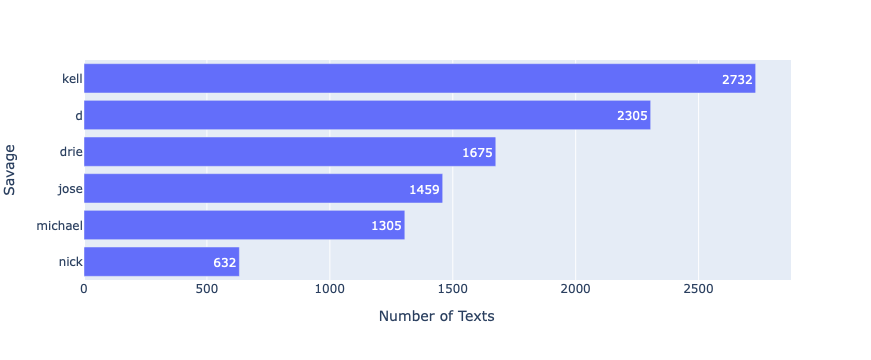

In [91]:
text_graph.show()